<a href="https://colab.research.google.com/github/b1sruthi/Sruthi_Data606/blob/main/docs/src/final_changes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
#from mixed_naive_bayes import MixedNB
from sklearn.metrics import roc_curve, auc 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import tree 
from sklearn import svm
import seaborn as sns
import pandas as pd
import numpy as np
import mlxtend

In [2]:
credit_df = pd.read_csv('/content/creditcard.csv')
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# performing eda
credit_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
#checking for null values
credit_df.isnull().sum().max()

0

In [5]:
#checking the number of columns
credit_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
#checking the number of fraud and non-fraud classes
print('No Frauds', round(credit_df['Class'].value_counts()[0]/len(credit_df) * 100,2), '% of the dataset')
print('Frauds', round(credit_df['Class'].value_counts()[1]/len(credit_df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [7]:
#checking the data type 
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

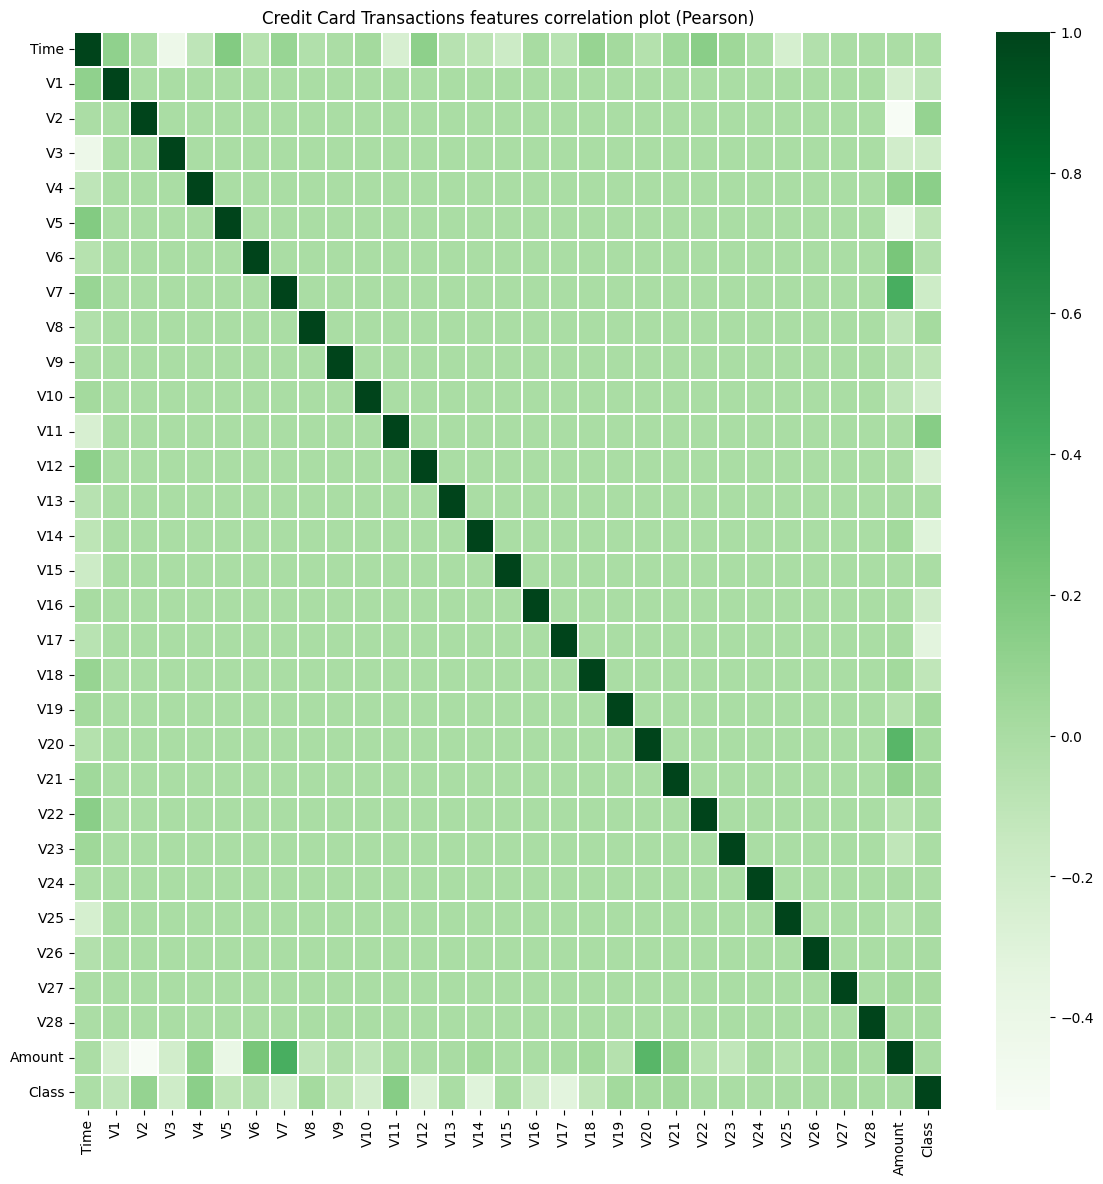

In [8]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = credit_df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Greens")
plt.show()

##### Since, there are no null values and the data seems fine we do not need to use the normalization techniques to perform data cleaning.

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

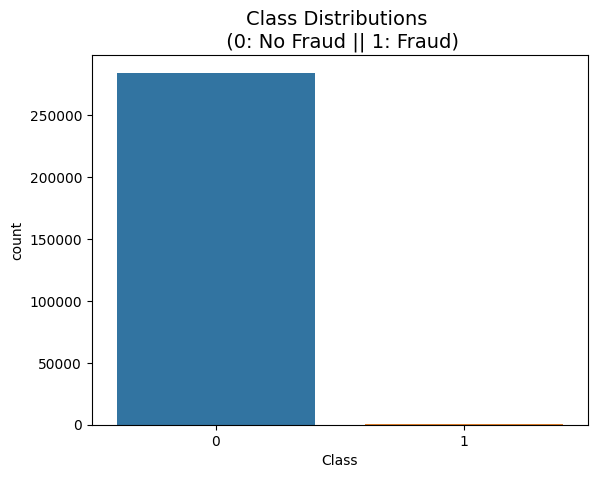

In [9]:
sns.countplot(x='Class', data=credit_df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

understanding the distribution of data

In [10]:
credit_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
credit_df = credit_df.dropna()

In [12]:
X = credit_df[['Amount','Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28']]
y = credit_df['Class']

In [13]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X, y = smote.fit_resample(X, y)

df_ = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [15]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
train_y_pred = rf_clf.predict(X_train)
test_y_pred = rf_clf.predict(X_test)

In [17]:
train_score = metrics.accuracy_score(y_train, train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)      # Generate classification report for test data

print('Random Forest Classifier Train Classification Report: \n\n', train_report,'\n\n')
print('Random Forest Classifier Test Classification Report: \n\n', test_report)

Random Forest Classifier Train Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    213378
           1       1.00      1.00      1.00    213094

    accuracy                           1.00    426472
   macro avg       1.00      1.00      1.00    426472
weighted avg       1.00      1.00      1.00    426472
 


Random Forest Classifier Test Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70937
           1       1.00      1.00      1.00     71221

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



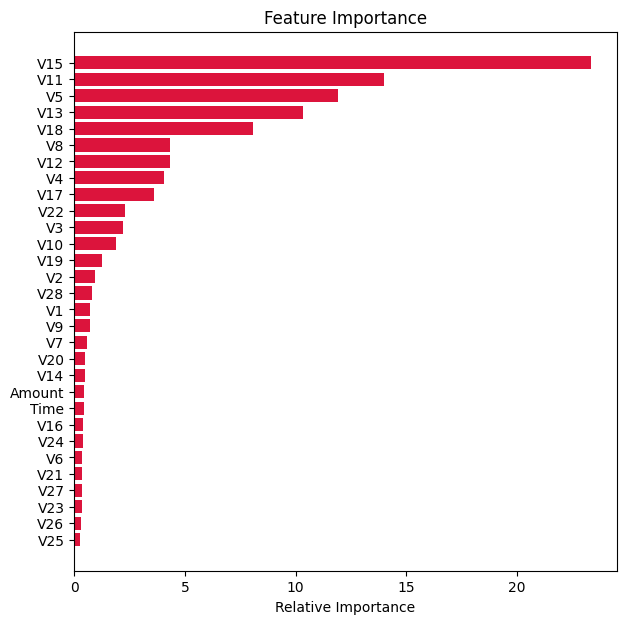

In [18]:
# Calculating the feature importance

feature_importance = rf_clf.feature_importances_
feature_importance = 100.0*(feature_importance/np.sum(feature_importance))

# Displaying the relative feature importance by a horizontal bar chart 

sorted_idx = np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0])+0.5
plt.figure(figsize=(7, 7))

plt.title("Feature Importance")
plt.xlabel('Relative Importance')
plt.barh(pos, feature_importance[sorted_idx], color='crimson', align="center")
plt.yticks(pos, credit_df.columns[0:-1][sorted_idx])
plt.show()

In [19]:
X = credit_df[['V3','V4','V5','V11','V12','V13','V15','V17','V18']]
y = credit_df['Class']

In [20]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X, y = smote.fit_resample(X, y)

df_ = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [22]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
train_y_pred = rf_clf.predict(X_train)
test_y_pred = rf_clf.predict(X_test)

In [24]:
train_score = metrics.accuracy_score(y_train, train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)      # Generate classification report for test data

print('Random Forest Classifier Train Classification Report: \n\n', train_report,'\n\n')
print('Random Forest Classifier Test Classification Report: \n\n', test_report)

Random Forest Classifier Train Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    213378
           1       1.00      1.00      1.00    213094

    accuracy                           1.00    426472
   macro avg       1.00      1.00      1.00    426472
weighted avg       1.00      1.00      1.00    426472
 


Random Forest Classifier Test Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70937
           1       1.00      1.00      1.00     71221

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



In [25]:
# Importing 'LinearRegression' through linear_model module

from sklearn.linear_model import LinearRegression  
#performing linear regression.
reg = LinearRegression()         # Instantiate
reg.fit(X_train, y_train)        # Fit the train data

LinearRegression()

In [26]:
 # Calculating R^2 score for train
r2_train_score = reg.score(X_train, y_train)  

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('Coefficients of Linear Model:', reg.coef_, '\n')
print('Intercept:', reg.intercept_)

R^2 score for train dataset =  0.5757 

Coefficients of Linear Model: [-0.01178032  0.06542644  0.02129271  0.03704124 -0.01410464 -0.04833723
  0.03108458 -0.02056634  0.0478847 ] 

Intercept: 0.2129495592150129


In [27]:
# calculating the predictions

y_pred = reg.predict(X_test)
y_pred[:20]  # show predictions of first 20 data points in test dataset

array([ 0.20468481,  0.26292929,  0.33178348,  0.96623979,  1.03584267,
        0.37115722,  0.34592184,  0.22838999,  0.12950601,  0.29644021,
        0.16141129, -0.0844441 ,  1.60349311,  0.92860541,  0.59490736,
        0.38842354,  0.68000631,  1.15004914,  0.17543871,  0.05170745])

In [28]:
# calculate performance of the model for test subset and Calculating R^2 score for train
r2_test_score = reg.score(X_test, y_test)  
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

R^2 score for test dataset =  0.5747 



In [29]:
from sklearn import tree 

tr_reg = tree.DecisionTreeRegressor()
tr_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [30]:
# Finding the predictions of the tree regressor for train and test subsets

train_y_pred = tr_reg.predict(X_train)
test_y_pred = tr_reg.predict(X_test)

In [31]:
r2_train_score = tr_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = tr_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

R^2 score for train dataset =  1.0 

R^2 score for test dataset =  0.9897 



In [32]:
# Importing BaggingRegressor from ensemble module

from sklearn.ensemble import BaggingRegressor

# Instantiating the bagged-tree regressor
bag_reg = BaggingRegressor(base_estimator=tree.DecisionTreeRegressor(), n_estimators=100, random_state=3)
bag_reg.fit(X_train, y_train)  # Fitting the train data

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100,
                 random_state=3)

In [33]:
# Finding the predictions of bagged-tree regressor for train and test subsets

train_y_pred = bag_reg.predict(X_train)
test_y_pred = bag_reg.predict(X_test)

In [34]:
r2_train_score = bag_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = bag_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

R^2 score for train dataset =  0.9995 

R^2 score for test dataset =  0.9964 



In [35]:
from sklearn.linear_model import LogisticRegression   

logreg = LogisticRegression(penalty = 'none', max_iter = 10000) 

logreg.fit(X_train, y_train) 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(max_iter=10000, penalty='none')

In [36]:
# Predict probabilities for first 10 instances in train and test subsets :

y_train_pred_prob = logreg.predict_proba(X_train)  
y_test_pred_prob = logreg.predict_proba(X_test)    
print('Train predictions for probabilities:\n\n', y_train_pred_prob[:10],'\n')
print('Test predictions for probabilities:\n\n', y_test_pred_prob[:10])

Train predictions for probabilities:

 [[7.34130529e-05 9.99926587e-01]
 [8.25165924e-01 1.74834076e-01]
 [9.96694626e-01 3.30537437e-03]
 [5.97222333e-04 9.99402778e-01]
 [7.11508776e-01 2.88491224e-01]
 [1.32830339e-05 9.99986717e-01]
 [1.13642975e-06 9.99998864e-01]
 [4.68548318e-07 9.99999531e-01]
 [1.02493690e-01 8.97506310e-01]
 [9.91061786e-01 8.93821381e-03]] 

Test predictions for probabilities:

 [[9.31014768e-01 6.89852325e-02]
 [9.25425062e-01 7.45749378e-02]
 [6.44653068e-01 3.55346932e-01]
 [6.33362578e-07 9.99999367e-01]
 [1.00917798e-06 9.99998991e-01]
 [5.43693621e-01 4.56306379e-01]
 [4.48370713e-01 5.51629287e-01]
 [9.54799292e-01 4.52007075e-02]
 [9.91742454e-01 8.25754574e-03]
 [8.97598842e-01 1.02401158e-01]]


In [37]:
y_train_pred = y_train_pred_prob.argmax(axis=1)  
y_test_pred = y_test_pred_prob.argmax(axis=1)  
print('Predicted class for train: ', y_train_pred[:10],'\n')     
print('Predicted class for test: ', y_test_pred[:10])


Predicted class for train:  [1 0 0 1 0 1 1 1 1 0] 

Predicted class for test:  [0 0 0 1 1 0 1 0 0 0]


In [38]:
# Calculating accuracy of model

from sklearn import metrics  

train_score = metrics.accuracy_score(y_train, y_train_pred) 

test_score = metrics.accuracy_score(y_test, y_test_pred)   

print('Train accuracy score of the model is ', round(train_score, 5),'\n')
print('Test accuracy score of the model is ', round(test_score, 5))

Train accuracy score of the model is  0.9302 

Test accuracy score of the model is  0.92905


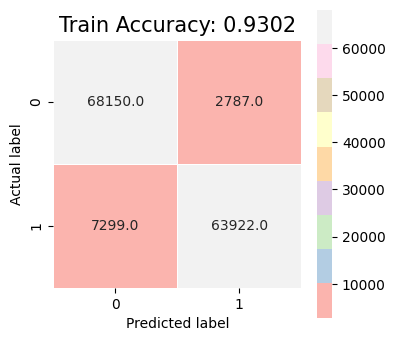

Classification Report for the Test Subset: 

               precision    recall  f1-score   support

           0       0.90      0.96      0.93     70937
           1       0.96      0.90      0.93     71221

    accuracy                           0.93    142158
   macro avg       0.93      0.93      0.93    142158
weighted avg       0.93      0.93      0.93    142158



In [39]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report

train_c_matrix = confusion_matrix(y_test, y_test_pred)  # Compute the train confusion matrix

plt.figure(figsize=(4,4))
sns.heatmap(train_c_matrix, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Train Accuracy: {0}'.format(round(train_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

# Classification Report

print('Classification Report for the Test Subset: \n\n', classification_report(y_test, y_test_pred))

In [40]:
from sklearn import tree # Importing 'tree' module from sklearn
tr_clf = tree.DecisionTreeClassifier()
tr_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
train_y_pred = tr_clf.predict(X_train)
test_y_pred = tr_clf.predict(X_test)

In [42]:
train_score = metrics.accuracy_score(y_train, train_y_pred) # Compute train␣ , →accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred) # Compute test␣ , →accuracy
train_report = classification_report(y_train, train_y_pred) # Generate␣ , →classification report for train data
test_report = classification_report(y_test, test_y_pred) # Generate␣ , →classification report for test data
print('Decision Tree Train Classification Report: \n\n', train_report,'\n\n')
print('Decision Tree Test Classification Report: \n\n', test_report)

Decision Tree Train Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    213378
           1       1.00      1.00      1.00    213094

    accuracy                           1.00    426472
   macro avg       1.00      1.00      1.00    426472
weighted avg       1.00      1.00      1.00    426472
 


Decision Tree Test Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70937
           1       1.00      1.00      1.00     71221

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



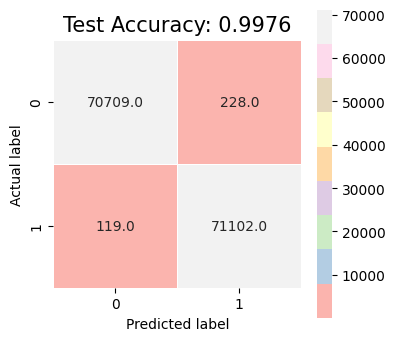

In [43]:
train_c_matrix = confusion_matrix(y_test, test_y_pred)  # Compute the train confusion matrix

plt.figure(figsize=(4,4))
sns.heatmap(train_c_matrix, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Accuracy: {0}'.format(round(test_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

In [44]:
# Constructing a bagged-tree classifier

from sklearn.ensemble import BaggingClassifier

#bag_clf = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(), n_estimators=18, random_state=3).95
bag_clf = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier())
bag_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [45]:
# Finding the predictions of the bagged-tree classifier for train and test subsets

train_y_pred = bag_clf.predict(X_train)
test_y_pred = bag_clf.predict(X_test)

In [46]:
train_score = metrics.accuracy_score(y_train, train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)      # Generate classification report for test data

print('Bagged Trees Classifier Train Classification Report: \n\n', train_report,'\n\n')
print('Bagged Trees Classifier Test Classification Report: \n\n', test_report)

Bagged Trees Classifier Train Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    213378
           1       1.00      1.00      1.00    213094

    accuracy                           1.00    426472
   macro avg       1.00      1.00      1.00    426472
weighted avg       1.00      1.00      1.00    426472
 


Bagged Trees Classifier Test Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70937
           1       1.00      1.00      1.00     71221

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



In [47]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold


print('No Frauds', round(credit_df['Class'].value_counts()[0]/len(credit_df) * 100,2), '% of the dataset')
print('Frauds', round(credit_df['Class'].value_counts()[1]/len(credit_df) * 100,2), '% of the dataset')

X = credit_df.drop('Class', axis=1)
y = credit_df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [53]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = credit_df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
5212,4992.0,-1.649685,0.874675,1.939903,1.237998,0.692070,2.152900,-0.082748,-0.795603,2.637251,...,-0.039960,-0.951228,-0.029101,-1.413841,0.095505,-0.461145,-0.513771,-0.785149,10.99,0
102782,68357.0,1.232604,-0.548931,1.087873,0.894082,-1.433055,-0.356797,-0.717492,0.003167,-0.100397,...,-0.448671,-0.517568,0.012833,0.699217,0.527258,-0.322607,0.080805,0.035427,19.59,1
264093,161262.0,2.091208,0.458962,-2.975218,0.302093,1.321005,-0.463900,0.153251,-0.066055,0.398017,...,0.065752,0.294275,-0.150367,-0.582067,0.370826,-0.085502,0.006091,-0.007475,1.00,0
43681,41607.0,-18.247513,8.713250,-17.880127,9.249459,-14.541213,-1.911564,-18.014660,5.522162,-9.283925,...,0.598843,0.615319,-0.486499,0.739268,-0.236845,-0.046082,-3.011473,-1.022147,53.95,1
53591,46057.0,-1.309441,1.786495,-1.371070,1.214335,-0.336642,-1.390120,-1.709109,0.667748,-1.699809,...,0.533521,-0.022180,-0.299556,-0.226416,0.364360,-0.475102,0.571426,0.293426,1.00,1


Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: Class, dtype: float64


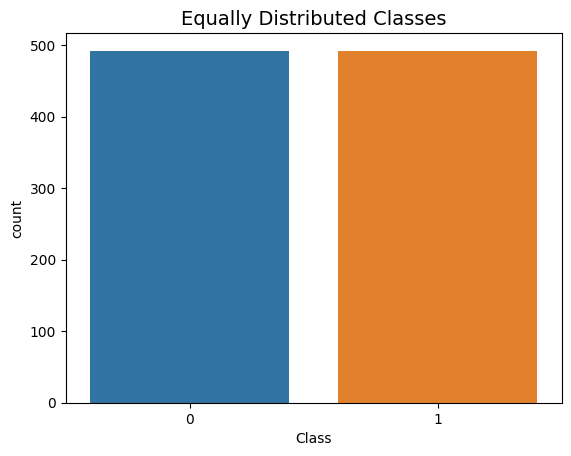

In [55]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))


sns.countplot(x='Class', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [65]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [66]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [68]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs = X_train.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [69]:
undersample_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                930       
                                                                 
 dense_7 (Dense)             (None, 32)                992       
                                                                 
 dense_8 (Dense)             (None, 2)                 66        
                                                                 
Total params: 1,988
Trainable params: 1,988
Non-trainable params: 0
_________________________________________________________________


In [70]:
undersample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [71]:
undersample_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)


Epoch 1/20
26/26 - 1s - loss: 2562.7629 - accuracy: 0.4897 - val_loss: 286.3639 - val_accuracy: 0.5063 - 819ms/epoch - 31ms/step
Epoch 2/20
26/26 - 0s - loss: 433.9889 - accuracy: 0.4833 - val_loss: 237.1774 - val_accuracy: 0.5000 - 92ms/epoch - 4ms/step
Epoch 3/20
26/26 - 0s - loss: 134.3326 - accuracy: 0.5310 - val_loss: 96.0625 - val_accuracy: 0.5000 - 93ms/epoch - 4ms/step
Epoch 4/20
26/26 - 0s - loss: 147.9549 - accuracy: 0.5056 - val_loss: 103.4536 - val_accuracy: 0.5063 - 82ms/epoch - 3ms/step
Epoch 5/20
26/26 - 0s - loss: 50.2552 - accuracy: 0.5342 - val_loss: 83.2149 - val_accuracy: 0.5000 - 102ms/epoch - 4ms/step
Epoch 6/20
26/26 - 0s - loss: 59.9346 - accuracy: 0.5278 - val_loss: 70.9172 - val_accuracy: 0.5063 - 87ms/epoch - 3ms/step
Epoch 7/20
26/26 - 0s - loss: 92.9695 - accuracy: 0.5580 - val_loss: 86.1157 - val_accuracy: 0.5063 - 92ms/epoch - 4ms/step
Epoch 8/20
26/26 - 0s - loss: 86.6294 - accuracy: 0.5310 - val_loss: 34.6664 - val_accuracy: 0.5886 - 103ms/epoch - 4ms/s

In [72]:
undersample_predictions = undersample_model.predict(original_Xtest, batch_size=200, verbose=0)

In [76]:
undersample_fraud_predictions = undersample_model.predict(original_Xtest, batch_size=200, verbose=0)

In [77]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [78]:
undersample_cm = confusion_matrix(original_ytest, undersample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

ValueError: ignored